In [1]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
from scipy.stats import pearsonr, linregress
#from sklearn.linear_model import LinearRegression
in_folder = '../data/'
sp.show_version()

SuPy version: 2024.3.14.dev0
-------------


In [2]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata SpartacusECH, standard values in GridLayout

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)


2024-03-19 12:05:07,337 - SuPy - INFO - All cache cleared.
2024-03-19 12:05:08,689 - SuPy - INFO - All cache cleared.


In [17]:
# check input
df_state_init_s2.loc[:, 'dz_wall']
df_state_init_s2.storageheatmethod
df_state_init_s2.netradiationmethod

ind_dim,0
grid,
1,1003


In [4]:
# Metdata
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = '2012 07 1'
s2 = '2012 07 10'
e = '2012 07 31'

# # warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]

2024-03-19 12:10:19,493 - SuPy - INFO - All cache cleared.


In [5]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)

2024-03-19 12:11:09,797 - SuPy - INFO - ====================
2024-03-19 12:11:09,799 - SuPy - INFO - Simulation period:
2024-03-19 12:11:09,799 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2024-03-19 12:11:09,800 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-19 12:11:09,802 - SuPy - INFO - 
2024-03-19 12:11:09,804 - SuPy - INFO - No. of grids: 1
2024-03-19 12:11:09,804 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 12:11:15,522 - SuPy - INFO - Execution time: 5.7 s
2024-03-19 12:11:15,524 - SuPy - INFO - ====================

2024-03-19 12:11:15,525 - SuPy - INFO - ====================
2024-03-19 12:11:15,526 - SuPy - INFO - Simulation period:
2024-03-19 12:11:15,529 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2024-03-19 12:11:15,532 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-19 12:11:15,533 - SuPy - INFO - 
2024-03-19 12:11:15,534 - SuPy - INFO - No. of grids: 1
2024-03-19 12:11:15,535 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 12:17:01,094 - Su

In [6]:
outputIn = [df_output_s.loc[grid].loc[s:e,:],df_output_s2.loc[grid].loc[s:e,:]]
namesIn = ['OHM', 'SUEWS/SS']
df_output_merge_x=pd.concat(outputIn,axis=1,join='inner', keys = namesIn).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_merge = df_output_merge_x.SUEWS

In [7]:
# Start and end date for inspection
splot = '2012-07-21'
eplot = '2012-07-30'

<AxesSubplot:title={'center':'Qs for one warm week in July'}, xlabel='datetime'>

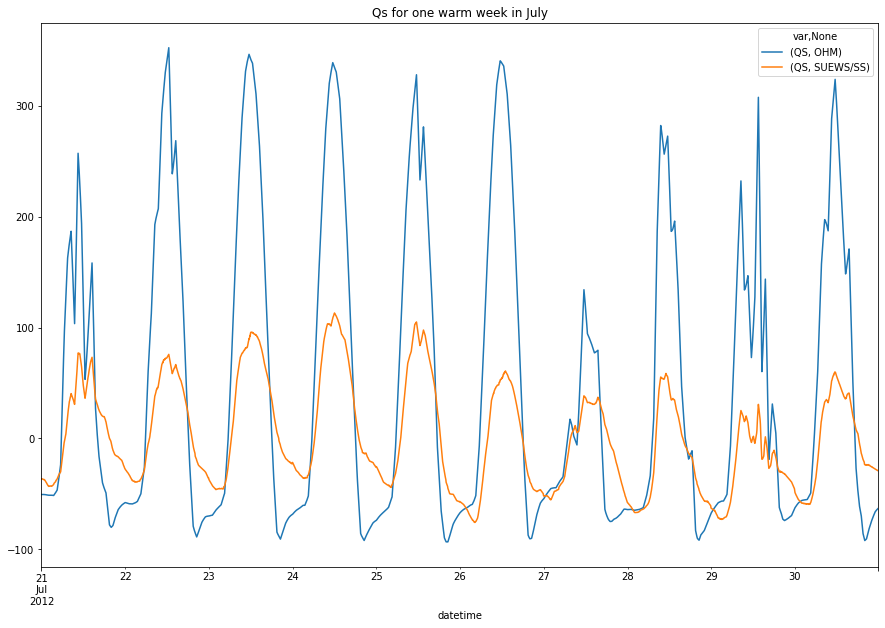

In [9]:
var = 'QS'

df_merge.loc[splot:eplot,[var]].plot(figsize=(15,10), title='Qs for one warm week in July')